In [4]:
pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 1.1 MB/s eta 0:00:0000:010:010m
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm

Matplotlib is building the font cache; this may take a moment.


In [3]:
data = yf.download('AAPL')
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600
...,...,...,...,...,...,...
2024-10-14,228.699997,231.729996,228.600006,231.300003,231.300003,39882100
2024-10-15,233.610001,237.490005,232.369995,233.850006,233.850006,64751400
2024-10-16,231.600006,232.119995,229.839996,231.779999,231.779999,34082200


In [6]:
log_returns = np.log(1+data['Adj Close'].pct_change())
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5*var)
drift

np.float64(0.0003038458329722829)

In [7]:
stdev = log_returns.std()
days = 500
trials = 1000
Z = norm.ppf(np.random.rand(days, trials))
daily_returns = np.exp(np.array(drift) + np.array(stdev) * Z)

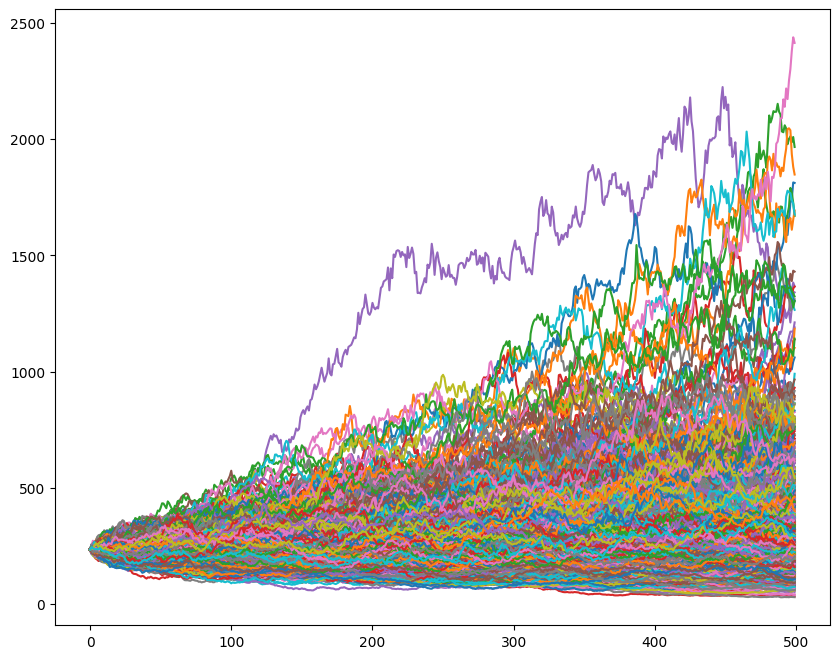

In [16]:
price_paths = np.zeros_like(daily_returns)

price_paths[0] = data['Adj Close'].iloc[-1]
for t in range(1, days):
    price_paths[t] = price_paths[t-1]*daily_returns[t]
plt.figure(figsize=[10,8])
plt.plot(price_paths)